In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
# Load the data from the CSV file
Loan_Approval_Data = pd.read_csv("/content/Loan_Approval.csv")
Loan_df = pd.DataFrame(Loan_Approval_Data)

print(Loan_df.head())

   person_age person_gender person_education  person_income  person_emp_exp  \
0        22.0        female           Master        71948.0               0   
1        21.0        female      High School        12282.0               0   
2        25.0        female      High School        12438.0               3   
3        23.0        female         Bachelor        79753.0               0   
4        24.0          male           Master        66135.0               1   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT    35000.0    PERSONAL          16.02   
1                   OWN     1000.0   EDUCATION          11.14   
2              MORTGAGE     5500.0     MEDICAL          12.87   
3                  RENT    35000.0     MEDICAL          15.23   
4                  RENT    35000.0     MEDICAL          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.49                         3.0         561.0  

In [7]:
# Extract the features for clustering
X = Loan_df[['person_income', 'credit_score']]
X = X.dropna()

print(X.head())

   person_income  credit_score
0        71948.0         561.0
1        12282.0         504.0
2        12438.0         635.0
3        79753.0         675.0
4        66135.0         586.0


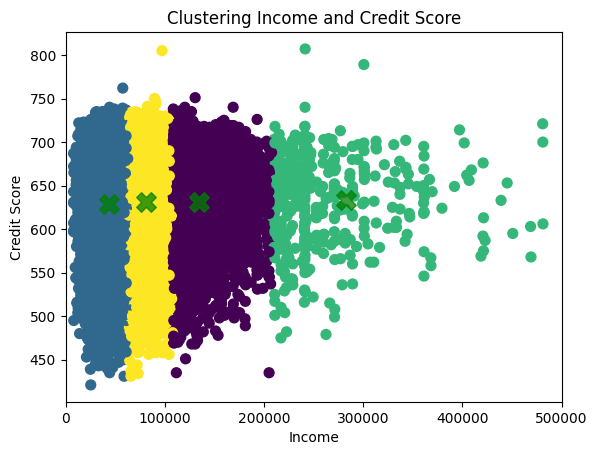

In [10]:
# Apply the K-Means clustering function
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X)
Y_kmeans = kmeans.predict(X)

# Plot the clusters
plt.scatter(X['person_income'], X['credit_score'], c = Y_kmeans, s = 50, cmap = 'viridis')

# Plot the cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = 'green', s = 200, alpha = 0.75, marker = 'X')
#Can change the scale to better investigate each cluster
plt.xlim(0, 500000)
plt.xlabel('Income')
plt.ylabel('Credit Score')
plt.title('Clustering Income and Credit Score')
#After looking at the graph, we can see the the clusters are mainly influenced by Income level
#The purpose of this graph was to see if there were a cluser of potential customers with high credit score and income.
#The application of this insight would be for targeted advertisements for a loan provider.
plt.show()